In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [11]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\CocaCola_Sales_Rawdata.csv")
data

,Quarter,Sales,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,0,0,0
1,Q2_86,2244.960999,0,1,0,0
2,Q3_86,2533.804993,0,0,1,0
3,Q4_86,2154.962997,0,0,0,1
4,Q1_87,1547.818996,1,0,0,0
5,Q2_87,2104.411995,0,1,0,0
6,Q3_87,2014.362999,0,0,1,0
7,Q4_87,1991.746998,0,0,0,1
8,Q1_88,1869.049999,1,0,0,0
9,Q2_88,2313.631996,0,1,0,0


In [13]:
data["t"] = np.arange(1,43)

In [14]:
data['squared_t'] = data.t*data.t

In [16]:
data['log_sales'] = np.log(data['Sales'])

In [19]:
data.head()

,Quarter,Sales,Q1,Q2,Q3,Q4,t,squared_t,log_sales
0,Q1_86,1734.827000,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,1,0,0,0,5,25,7.344602


<AxesSubplot:>

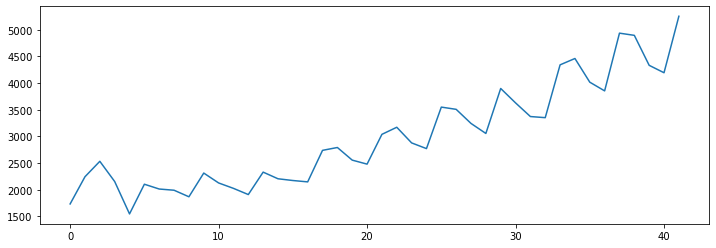

In [20]:
data['Sales'].plot(figsize=(12,4))

<AxesSubplot:>

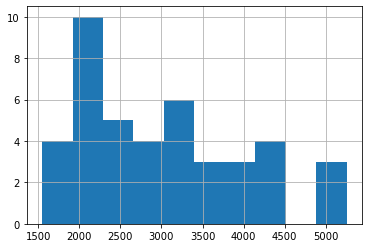

In [21]:
data['Sales'].hist()

## Splitting the data into train test :-

In [31]:
train = data.head(38)
test = data.tail(4)

In [32]:
test

,Quarter,Sales,Q1,Q2,Q3,Q4,t,squared_t,log_sales
38,Q3_95,4895.0,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,0,1,0,0,42,1764,8.566555


## Applying different different models :-

In [35]:
import statsmodels.formula.api as smf

- Linear model :-

In [42]:
model1 = smf.ols('Sales~t', data=train).fit()

In [95]:
pred_linear = pd.Series(model1.predict(pd.DataFrame(test.t)))

In [96]:
pred_linear

38    4145.466199
39    4213.536208
40    4281.606217
41    4349.676226
dtype: float64

In [106]:
rmse_linear = np.sqrt(np.mean(pred_linear-test.Sales)**2)
rmse_linear

421.1787876367782

- Exponential model :-

In [47]:
model2 = smf.ols('log_sales~t', data=train).fit()

In [50]:
pred_expo = np.exp(model2.predict(test.t))

In [51]:
pred_expo

38    4295.822022
39    4399.046102
40    4504.750549
41    4612.994962
dtype: float64

In [53]:
rmse_expo = np.sqrt(np.mean(pred_expo-test.Sales)**2)
rmse_expo

215.59659141319707

- Quadratic model :-

In [54]:
model3 = smf.ols('Sales~t+squared_t', data=train).fit()

In [60]:
pred_quad = model3.predict(test[['t','squared_t']])

In [61]:
pred_quad

38    4669.104172
39    4817.733869
40    4970.391551
41    5127.077217
dtype: float64

In [62]:
rmse_quad = np.sqrt(np.mean(pred_quad-test.Sales)**2)
rmse_quad

227.32670214586665

- Additive Seasonality model :-

In [108]:
model4 = smf.ols('Sales~t+Q1+Q2+Q3+Q4', data=train).fit()

In [109]:
pred_add_seas = model4.predict(test[['t','Q1','Q2','Q3','Q4']])

In [110]:
pred_add_seas

38    4292.265126
39    4066.761792
40    3961.769195
41    4639.214094
dtype: float64

In [111]:
rmse_add_seas = np.sqrt(np.mean(pred_add_seas-test.Sales)**2)
rmse_add_seas

428.7474485862565

- Additive Seasonability Quadratic model :-

In [70]:
model5 = smf.ols('Sales~Q1+Q2+Q3+Q4+t+squared_t', data=train).fit()

In [71]:
pred_add_seas_quad = model5.predict(test[['Q1','Q2','Q3','Q4','t','squared_t']])

In [72]:
pred_add_seas_quad

38    4852.677797
39    4709.186074
40    4638.364982
41    5406.022652
dtype: float64

In [74]:
rmse_add_seas_quad = np.sqrt(np.mean(pred_add_seas_quad-test.Sales)**2)
rmse_add_seas_quad

232.81287624425772

- Multiplicative Seasonality model :-

In [85]:
model6 = smf.ols('log_sales~Q1+Q2+Q3+Q4+t', data=train).fit()

In [87]:
pred_multi_seas = np.exp(model6.predict(test[['Q1','Q2','Q3','Q4','t']]))

In [88]:
pred_multi_seas

38    4555.076459
39    4224.164912
40    3983.650878
41    5074.659987
dtype: float64

In [89]:
rmse_multi_seas = np.sqrt(np.mean(pred_multi_seas-test.Sales)**2)
rmse_multi_seas

209.3619406943235

In [112]:
dict_ = {'model': pd.Series(['rmse_linear','rmse_expo','rmse_quad','rmse_add_seas','rmse_add_seas_quad','rmse_multi_seas']),
        'rmse_values': ([rmse_linear, rmse_expo, rmse_quad,rmse_add_seas, rmse_add_seas_quad, rmse_multi_seas  ])}

In [113]:
table = pd.DataFrame(dict_)

In [114]:
table.sort_values(['rmse_values'])

,model,rmse_values
5,rmse_multi_seas,209.361941
1,rmse_expo,215.596591
2,rmse_quad,227.326702
4,rmse_add_seas_quad,232.812876
0,rmse_linear,421.178788
3,rmse_add_seas,428.747449


- we have to created a lots of dummy variables which are as follows :-
- Q1
- Q2
- Q3
- Q4


- We have created total 6 models and there rmse values are given in above table.
- from all the models Multiplicative Seasonality model gives good accuracy compared to other model

- our final model :- 

In [115]:
final= smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=data).fit()